In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy.distance

In [103]:
df = pd.read_csv("BRAZIL_CITIES.csv", sep=";")
selectedColumns = [ "CITY", "STATE", 'IBGE_DU', 
                    'IBGE_DU_URBAN', #'IBGE_DU_RURAL', 
                    'IBGE_POP', 
                    'IBGE_15-59', 'IDHM', 'LONG', 'LAT', 
                    'GDP', 'GDP_CAPITA']
df = df[selectedColumns]

In [104]:
list(df)

['CITY',
 'STATE',
 'IBGE_DU',
 'IBGE_DU_URBAN',
 'IBGE_POP',
 'IBGE_15-59',
 'IDHM',
 'LONG',
 'LAT',
 'GDP',
 'GDP_CAPITA']

No handles with labels found to put in legend.


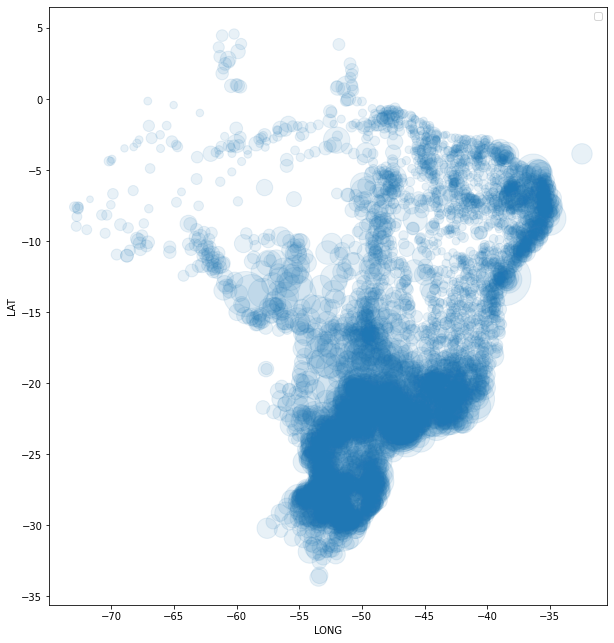

In [105]:
df.plot(
    kind='scatter',
    x='LONG',
    y='LAT',
    s=df['GDP_CAPITA']/100,
    figsize=(10, 11),
    alpha=0.1,
    sharex=False,
)
plt.legend()
plt.show()

In [106]:
df.isna().sum()

CITY              0
STATE             0
IBGE_DU          10
IBGE_DU_URBAN    10
IBGE_POP          8
IBGE_15-59        8
IDHM              8
LONG              9
LAT               9
GDP               3
GDP_CAPITA        3
dtype: int64

In [107]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy='median')
num_cols = ['IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_POP', 'IBGE_15-59', 'IDHM', 'LONG', 'LAT', 'GDP', 'GDP_CAPITA']
df[num_cols] = simple_imputer.fit_transform(df[num_cols])

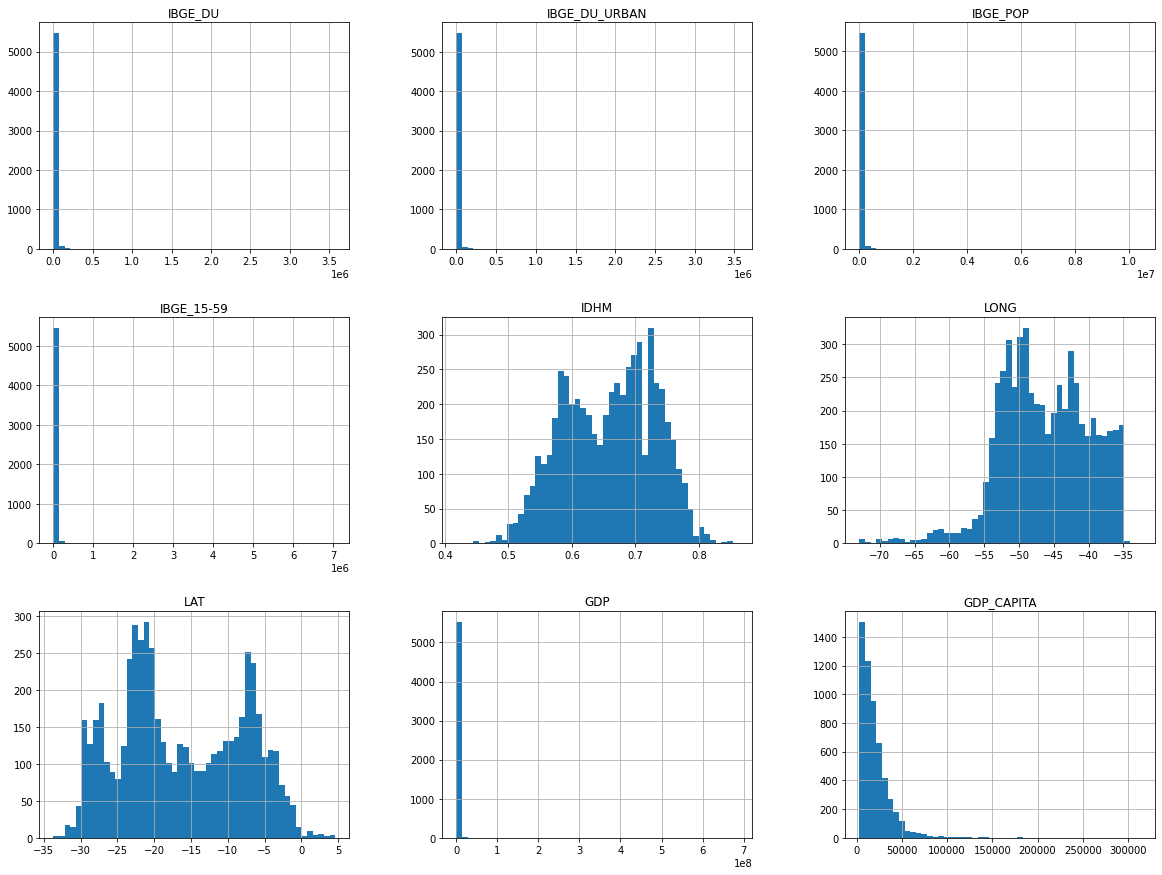

In [108]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## HIPOTESE: 

Partição: Só cidades de uma região (Provavelmente SE, não decidimos)
Motivo: Brasil é muito grande e diverso, não faz sentido aplicar os mesmo parâmetros e 

REDE: Cidades ligadas por proximidade, usando LAT/LONG.

Vertices: Cidades, com atributo Nome, IDH, GDP, GDP/cap, Capital, População

Closeness ponderado por algo (que não a variável dependente)

Exemplo de hipótese: Cidades com alta intermediação, tendem a ter GDP (per capita?) maior.

Mecanismo: Por haver maior itermediação entre outras cidades, o comércio deve ser fortalecido pela diversidade de pessoas que passam por lá, além da diversidade de mercadorias.

In [109]:
df_ligacoes = pd.read_excel("Base_de_dados_ligacoes_rodoviarias_e_hidroviarias_2016.xlsx")
selectedColumns2 = ['UF_A','NOMEMUN_A','UF_B','NOMEMUN_B','VAR04','VAR07','VAR08','VAR09','VAR10','VAR11','VAR14']
df_ligacoes = df_ligacoes[selectedColumns2].rename({"VAR04":"T_min", "VAR07": "Freq", "VAR08": "LongA","VAR09": "LatA","VAR10": "LongB","VAR11": "LatB", "VAR14":"RelCost"},axis=1)

In [110]:
# df_completo = pd.merge(df,df_ligacoes,left_on='CITY',right_on='NOMEMUN_A')
# df_completo = df_completo[['CITY','STATE', 'CAPITAL', 'IDHM', 'IDHM_Renda', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'NOMEMUN_B','UF_B', 'VAR13', 'VAR08', 'VAR09', 'VAR10', 'VAR11']]

In [111]:
longA, latA = df_ligacoes["LongA"], df_ligacoes["LatA"]
longB, latB = df_ligacoes["LongB"], df_ligacoes["LatB"]
df_ligacoes["Dist"] = [geopy.distance.geodesic((i, e),(f, g)).km for i,e,f,g in zip(latA,longA,latB,longB)]

In [112]:
df_lig_limpo = df_ligacoes.drop(["LongA", "LatA", "LongB", "LatB", "NOMEMUN_A", "NOMEMUN_B", "UF_A", "UF_B"], axis=1)
df_lig_limpo["CITY_STATE_A"] = df_ligacoes["NOMEMUN_A"] + ' - ' + df_ligacoes["UF_A"]
df_lig_limpo["CITY_STATE_B"] = df_ligacoes["NOMEMUN_B"] + ' - ' + df_ligacoes["UF_B"]
df_lig_limpo

,T_min,Freq,RelCost,Dist,CITY_STATE_A,CITY_STATE_B
0,2160,7.5,0.023148,570.727977,Manaus - AM,Uarini - AM
1,8640,3.0,0.026620,787.834843,Japurá - AM,Manaus - AM
2,375,42.0,0.028000,279.152113,Figueirópolis D'Oeste - MT,Várzea Grande - MT
3,1920,7.5,0.031250,532.505675,Alvarães - AM,Manaus - AM
4,1380,6.0,0.036232,313.315756,Alvarães - AM,Codajás - AM
...,...,...,...,...,...,...
65633,148,7.0,0.066216,62.540653,Croatá - CE,Ubajara - CE
65634,90,7.0,0.171778,40.236642,Juquitiba - SP,Pedro de Toledo - SP
65635,240,14.0,0.136500,153.413295,Presidente Prudente - SP,Mandaguaçu - PR
65636,60,21.0,0.159500,34.112975,Mandaguaçu - PR,Marialva - PR


In [113]:
df_limpo = df.drop(["LONG", "LAT", "CITY", "STATE"], axis=1)
df_limpo["CITY_STATE"] = df["CITY"] + ' - ' + df["STATE"]
df_limpo

,IBGE_DU,IBGE_DU_URBAN,IBGE_POP,IBGE_15-59,IDHM,GDP,GDP_CAPITA,CITY_STATE
0,2137.0,1546.0,5300.0,3542.0,0.708,166.41,20664.57,Abadia De Goiás - GO
1,2328.0,1481.0,4154.0,2709.0,0.690,180.09,25591.70,Abadia Dos Dourados - MG
2,4655.0,3233.0,10656.0,6896.0,0.690,287984.49,15628.40,Abadiânia - GO
3,7694.0,6667.0,18464.0,11979.0,0.698,430235.36,18250.42,Abaeté - MG
4,31061.0,19057.0,82956.0,53516.0,0.628,1249255.29,8222.36,Abaetetuba - PA
...,...,...,...,...,...,...,...,...
5568,11637.0,8461.0,32497.0,19371.0,0.585,342261.06,7089.97,Xique-Xique - BA
5569,673.0,489.0,1469.0,874.0,0.623,19582.06,8793.02,Zabelê - PB
5570,799.0,638.0,1836.0,1165.0,0.730,75934.89,29149.67,Zacarias - SP
5571,11886.0,7611.0,30803.0,18136.0,0.595,380509.30,7489.46,Zé Doca - MA


In [114]:
city_links = set(df_lig_limpo["CITY_STATE_A"].value_counts().index.tolist()).union(df_lig_limpo["CITY_STATE_B"].value_counts().index.tolist())
len(city_links)

5420

In [115]:
known_cities = set(df_limpo["CITY_STATE"].value_counts().index.tolist())
len(known_cities)

5573

In [116]:
cities_intersection = known_cities.intersection(city_links)
len(cities_intersection)

4089

In [117]:
vertices = df_limpo.drop(df_limpo[~df_limpo["CITY_STATE"].isin(cities_intersection)].index)
vertices = vertices.reset_index().drop("index",axis=1)
vertices

,IBGE_DU,IBGE_DU_URBAN,IBGE_POP,IBGE_15-59,IDHM,GDP,GDP_CAPITA,CITY_STATE
0,4655.0,3233.0,10656.0,6896.0,0.690,287984.49,15628.40,Abadiânia - GO
1,7694.0,6667.0,18464.0,11979.0,0.698,430235.36,18250.42,Abaeté - MG
2,31061.0,19057.0,82956.0,53516.0,0.628,1249255.29,8222.36,Abaetetuba - PA
3,2791.0,1251.0,4538.0,2631.0,0.628,73151.46,6370.41,Abaiara - CE
4,2572.0,1193.0,3725.0,2319.0,0.603,64324.59,6982.70,Abaíra - BA
...,...,...,...,...,...,...,...,...
4084,11637.0,8461.0,32497.0,19371.0,0.585,342261.06,7089.97,Xique-Xique - BA
4085,673.0,489.0,1469.0,874.0,0.623,19582.06,8793.02,Zabelê - PB
4086,799.0,638.0,1836.0,1165.0,0.730,75934.89,29149.67,Zacarias - SP
4087,11886.0,7611.0,30803.0,18136.0,0.595,380509.30,7489.46,Zé Doca - MA


In [118]:
arestas = df_lig_limpo.drop(df_lig_limpo[~df_lig_limpo["CITY_STATE_A"].isin(cities_intersection)].index)
arestas = arestas.drop(arestas[~arestas["CITY_STATE_B"].isin(cities_intersection)].index)
arestas = arestas.reset_index().drop("index",axis=1)
arestas

,T_min,Freq,RelCost,Dist,CITY_STATE_A,CITY_STATE_B
0,2160,7.5,0.023148,570.727977,Manaus - AM,Uarini - AM
1,8640,3.0,0.026620,787.834843,Japurá - AM,Manaus - AM
2,375,42.0,0.028000,279.152113,Figueirópolis D'Oeste - MT,Várzea Grande - MT
3,1920,7.5,0.031250,532.505675,Alvarães - AM,Manaus - AM
4,1380,6.0,0.036232,313.315756,Alvarães - AM,Codajás - AM
...,...,...,...,...,...,...
43838,30,70.0,0.186667,11.597523,Pedrinópolis - MG,Santa Juliana - MG
43839,148,7.0,0.066216,62.540653,Croatá - CE,Ubajara - CE
43840,240,14.0,0.136500,153.413295,Presidente Prudente - SP,Mandaguaçu - PR
43841,60,21.0,0.159500,34.112975,Mandaguaçu - PR,Marialva - PR


In [119]:
len(set(arestas["CITY_STATE_A"]).union(set(arestas["CITY_STATE_B"]))) # Ok i guess

4046

In [120]:
arestas.to_csv("redesoc/notebooks/arestas.csv")
vertices.to_csv("redesoc/notebooks/vertices.csv")

In [121]:
# 1m30s : Verifica ligações repetidas (mesmo em ordem diferente, SP->MG == MG->SP)
# lista_pares = []
# for i, e in zip(arestas["CITY_STATE_A"], arestas["CITY_STATE_B"]):
#     lista_pares.append(set([i,e]))
# lista_pares
# for i in range(len(lista_pares)):
#     for j in range(i+1,len(lista_pares)):
#         if lista_pares[i] == lista_pares[j]:
#             print(lista_pares[i] , lista_pares[j])
#             break